In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import os
global weather_df

In [16]:
weather_df = pd.read_csv('KARNATAKA.csv', parse_dates=['date_time'], index_col='date_time')
weather_df.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,18,11,2,91,0.0,1014,14,10,109,8
2009-01-01 01:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,17,9,2,93,0.0,1014,14,7,85,6
2009-01-01 02:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,16,7,2,94,0.0,1014,13,5,61,4
2009-01-01 03:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,15,5,2,96,0.0,1014,12,2,37,3
2009-01-01 04:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,18,5,1,88,0.0,1015,14,5,45,3


In [17]:
weather_df = weather_df.loc[:,['mintempC', 'maxtempC', 'tempC','precipMM', 'humidity']]
print(f'dataset shape (rows, columns) - {weather_df.shape}')
weather_df.head()

dataset shape (rows, columns) - (96432, 5)


,mintempC,maxtempC,tempC,precipMM,humidity
date_time,,,,,
2009-01-01 00:00:00,12,27,14,0.0,91
2009-01-01 01:00:00,12,27,14,0.0,93
2009-01-01 02:00:00,12,27,13,0.0,94
2009-01-01 03:00:00,12,27,12,0.0,96
2009-01-01 04:00:00,12,27,14,0.0,88


In [18]:
weather_df.describe()

,mintempC,maxtempC,tempC,precipMM,humidity
count,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,19.336735,29.646093,23.979810,0.077719,64.895460
std,2.773771,3.446427,4.540028,0.385865,21.856869
min,11.000000,18.000000,0.000000,0.000000,6.000000
25%,18.000000,27.000000,21.000000,0.000000,49.000000
50%,20.000000,29.000000,23.000000,0.000000,68.000000
75%,21.000000,32.000000,27.000000,0.000000,83.000000
max,28.000000,40.000000,40.000000,16.900000,100.000000


array([<AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>,
       <AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>,
       <AxesSubplot:xlabel='date_time'>], dtype=object)

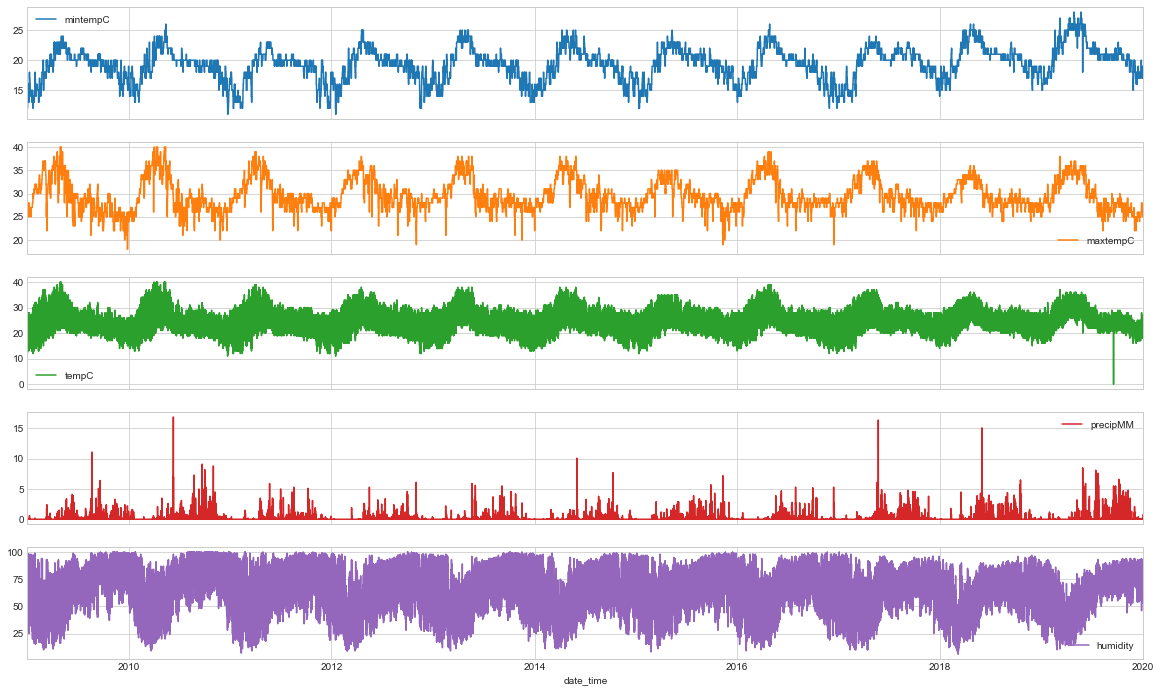

In [19]:
weather_df.plot(subplots=True, figsize=(20,12))

In [20]:
tempdf = pd.DataFrame()
humidf = pd.DataFrame()
percdf = pd.DataFrame()

In [21]:
def ClimatePred(filename):
    df=pd.read_csv(str(filename)+str(".csv"),parse_dates=['date_time'])
    df['year'] = pd.DatetimeIndex(df['date_time']).year
    df['month'] = pd.DatetimeIndex(df['date_time']).month
    
    global tempdf
    x=pd.DataFrame(df.groupby(['year'])[['tempC']].mean().sort_values(by='year',ascending=False))
    tempdf[str(filename)] = x['tempC']
    print(x)
    x=x.reset_index('year')
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(10,8))
    sns.barplot(data=x,x='tempC',y='year',orient='h',palette='viridis')
    
    global humidf
    x=pd.DataFrame(df.groupby(['year'])[['humidity']].mean().sort_values(by='year',ascending=False))
    humidf[str(filename)] = x['humidity']

    global percdf
    x=pd.DataFrame(df.groupby(['year'])[['precipMM']].mean().sort_values(by='year',ascending=False))
    percdf[str(filename)] = x['precipMM']

          tempC
year           
2020  18.708333
2019  28.867009
2018  28.118379
2017  27.779452
2016  27.604850
2015  27.936073
2014  28.022260
2013  27.252169
2012  27.383652
2011  26.812215
2010  27.616438
2009  27.769406
          tempC
year           
2020  21.708333
2019  25.017466
2018  24.631050
2017  24.145434
2016  23.949226
2015  23.849087
2014  24.060046
2013  23.810046
2012  23.898224
2011  23.389612
2010  23.627511
2009  23.406735
          tempC
year           
2020  25.083333
2019  28.382763
2018  28.235616
2017  27.697374
2016  27.136043
2015  27.694406
2014  27.612785
2013  27.110731
2012  27.050660
2011  27.133447
2010  27.244292
2009  27.523516
          tempC
year           
2020  21.666667
2019  28.015639
2018  27.814384
2017  27.177968
2016  26.253301
2015  26.819635
2014  26.474543
2013  25.967922
2012  26.282445
2011  25.750571
2010  26.432192
2009  26.492694
          tempC
year           
2020  12.083333
2019  27.417466
2018  27.112671
2017  27.112215
2016  27

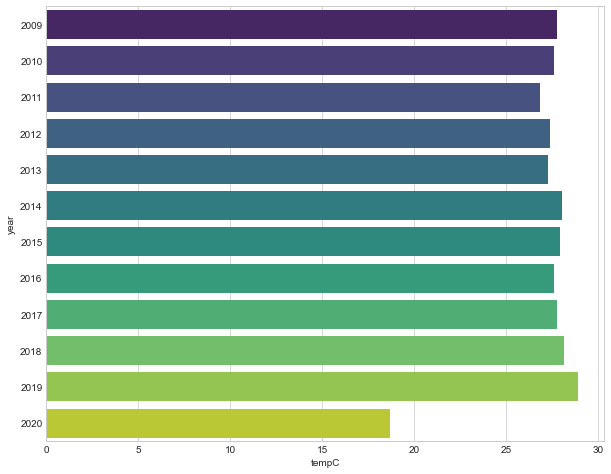

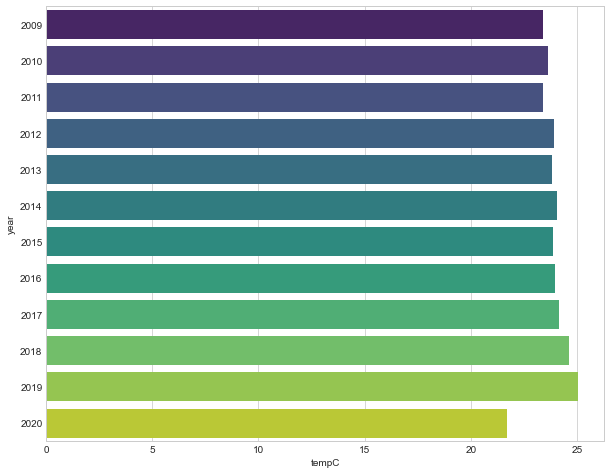

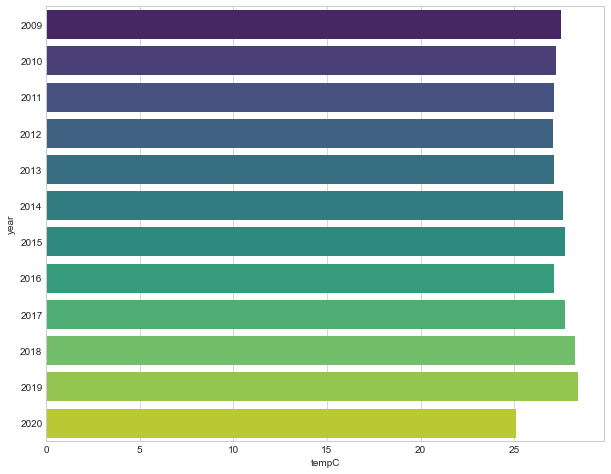

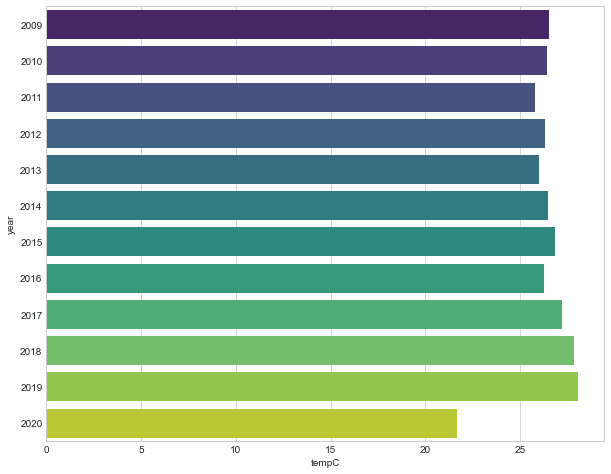

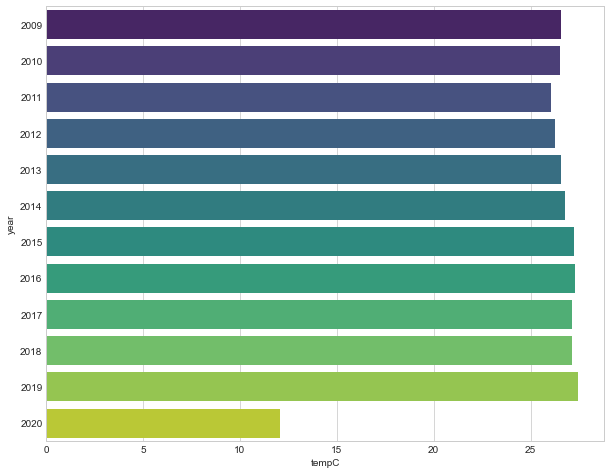

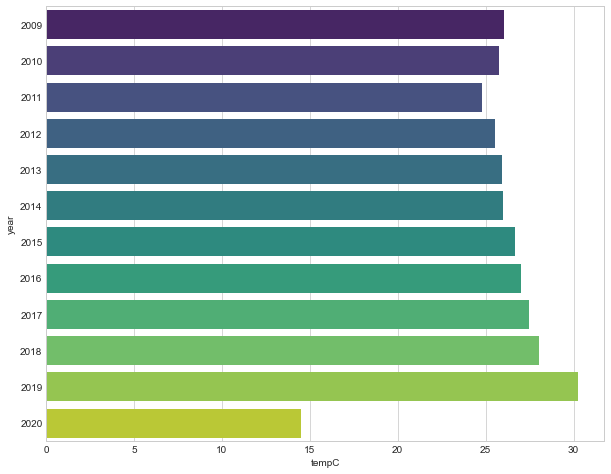

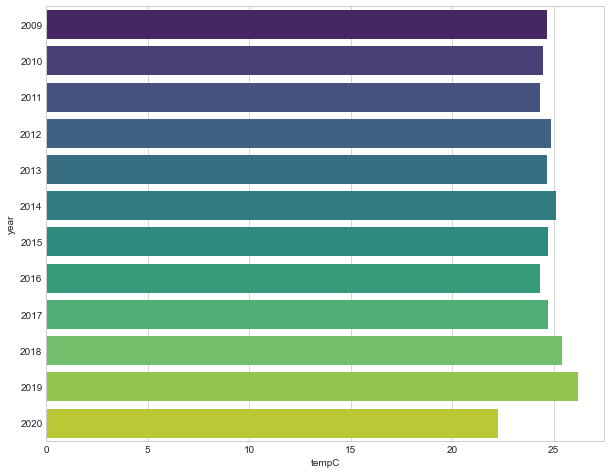

In [22]:
lis = ['UTTAR_PD','KARNATAKA','MAHARASHTRA','ANDHRA_PD','RAJASTHAN','DELHI','TAMIL_NADU']
for i in lis:
    ClimatePred(i)


In [23]:
print(tempdf)


       UTTAR_PD  KARNATAKA  MAHARASHTRA  ANDHRA_PD  RAJASTHAN      DELHI  \
year                                                                       
2020  18.708333  21.708333    25.083333  21.666667  12.083333  14.500000   
2019  28.867009  25.017466    28.382763  28.015639  27.417466  30.222603   
2018  28.118379  24.631050    28.235616  27.814384  27.112671  28.009132   
2017  27.779452  24.145434    27.697374  27.177968  27.112215  27.483105   
2016  27.604850  23.949226    27.136043  26.253301  27.303734  27.001366   
2015  27.936073  23.849087    27.694406  26.819635  27.258562  26.665183   
2014  28.022260  24.060046    27.612785  26.474543  26.753311  25.958676   
2013  27.252169  23.810046    27.110731  25.967922  26.586644  25.950000   
2012  27.383652  23.898224    27.050660  26.282445  26.246129  25.531193   
2011  26.812215  23.389612    27.133447  25.750571  26.072146  24.794521   
2010  27.616438  23.627511    27.244292  26.432192  26.513927  25.749315   
2009  27.769

In [24]:
print(humidf)


       UTTAR_PD  KARNATAKA  MAHARASHTRA  ANDHRA_PD  RAJASTHAN      DELHI  \
year                                                                       
2020  72.250000  78.125000    57.500000  77.458333  47.958333  34.250000   
2019  49.020890  62.811986    67.288242  55.852740  40.303539  37.326941   
2018  44.859817  60.087557    64.683219  47.174087  35.639269  36.552055   
2017  45.797146  63.423059    66.217580  47.469749  34.482763  35.196689   
2016  48.134677  63.342668    67.408698  54.376480  37.346881  37.858379   
2015  46.130251  65.878425    66.351484  51.720091  35.432534  38.453311   
2014  43.524886  63.027283    64.510502  51.039498  36.876598  39.759132   
2013  50.129110  64.752055    66.934247  56.714840  37.402626  43.023744   
2012  45.774704  62.953324    64.922814  51.887523  35.166553  42.503529   
2011  46.711187  66.415183    66.191895  53.409475  40.809932  51.273744   
2010  50.672831  71.526370    70.806621  57.218721  42.059703  49.544635   
2009  47.770

In [25]:
print(percdf)

      UTTAR_PD  KARNATAKA  MAHARASHTRA  ANDHRA_PD  RAJASTHAN     DELHI  \
year                                                                     
2020  0.195833   0.120833     0.000000   0.337500   0.000000  0.000000   
2019  0.275445   0.226941     0.346096   0.235377   0.101461  0.086370   
2018  0.062089   0.074178     0.083447   0.047454   0.035354  0.031678   
2017  0.056644   0.081233     0.125240   0.041450   0.015400  0.017146   
2016  0.067953   0.050979     0.181432   0.045048   0.036521  0.016393   
2015  0.063881   0.061587     0.115354   0.039897   0.020742  0.032158   
2014  0.038584   0.045103     0.106039   0.025308   0.016929  0.009715   
2013  0.058927   0.044486     0.144212   0.044612   0.016564  0.012763   
2012  0.074032   0.041746     0.131853   0.037511   0.017179  0.017065   
2011  0.077500   0.056689     0.178174   0.031199   0.045263  0.062842   
2010  0.075685   0.091313     0.149030   0.042329   0.022557  0.046769   
2009  0.085947   0.080708     0.114578